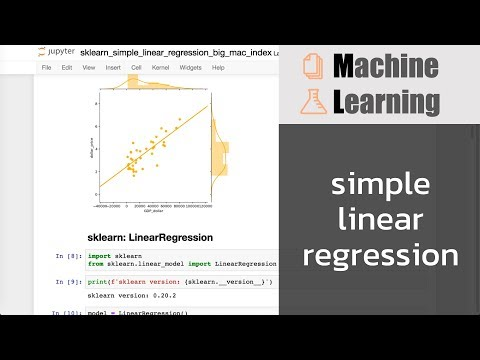

In [1]:
#เรียนรู้ การเขียนpython วิเคราะห์ข้อมูลด้วยอัลกอริทึม Simple Linear Regression
from IPython.display import IFrame, YouTubeVideo, SVG, HTML
YouTubeVideo('1Rkt8Zk3KBM', 400,300)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 0.23.4
numpy   version: 1.15.4
seaborn version: 0.9.0


In [3]:
url='https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.011,0.475,0.850,0.906,0.946
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.117,-0.181,0.027,0.059,0.081
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.485,0.823,1.286,1.356,1.405
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.087,-0.202,0.000,0.031,0.052
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.244,-0.087,0.145,0.180,0.204


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 14 columns):
date             591 non-null datetime64[ns]
iso_a3           591 non-null object
currency_code    591 non-null object
name             591 non-null object
local_price      591 non-null float64
dollar_ex        591 non-null float64
dollar_price     591 non-null float64
GDP_dollar       591 non-null float64
adj_price        591 non-null float64
USD              591 non-null float64
EUR              591 non-null float64
GBP              591 non-null float64
JPY              591 non-null float64
CNY              591 non-null float64
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 64.7+ KB


In [5]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.419,-0.434,-0.338,-0.261,-0.396
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.192,-0.213,-0.080,0.028,-0.160
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.406,0.370,0.601,0.789,0.463
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.122,-0.145,0.000,0.117,-0.087
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.040,0.013,0.185,0.323,0.082


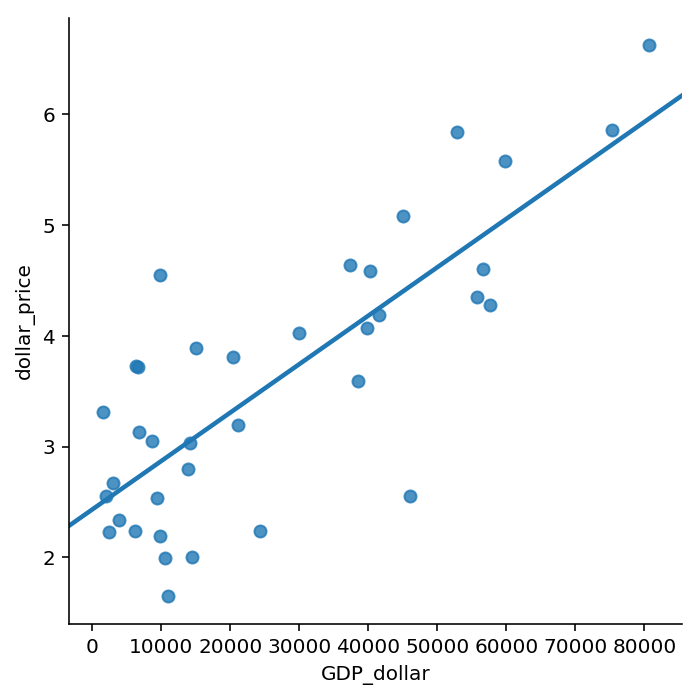

In [6]:
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None)

/Users/prasert/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


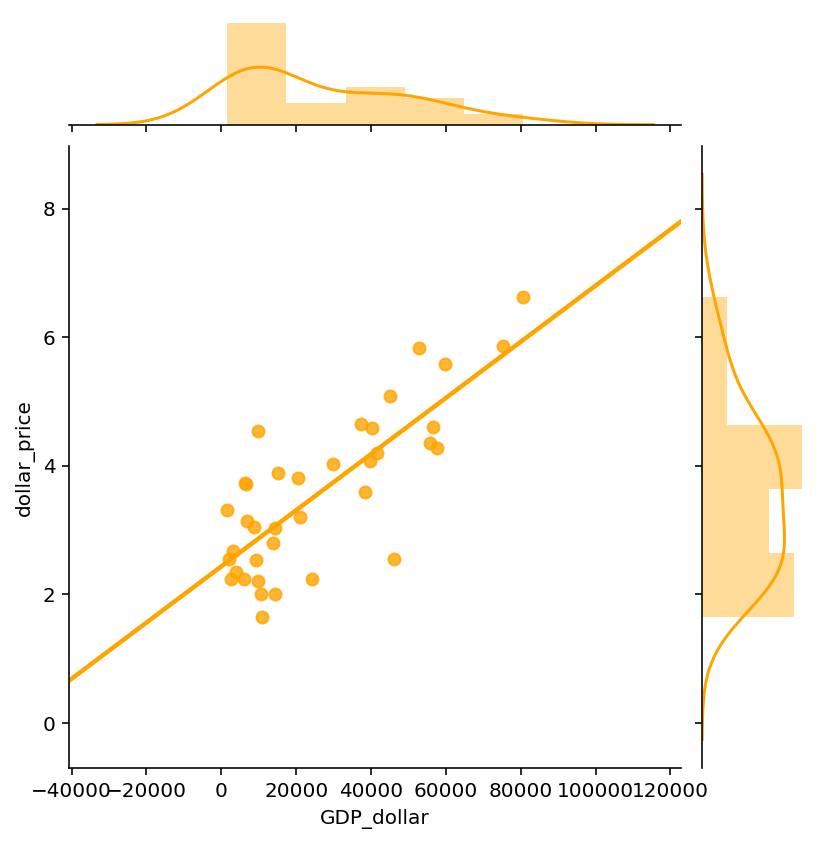

In [7]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data=df, kind='reg', ci=None,
              color='orange');

## sklearn: LinearRegression

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression

In [9]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.20.2


In [10]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
df['GDP_dollar']

554    14462.920000
555    55692.730000
556     9895.765000
557    39800.274000
558    45094.605000
559    15067.724000
560     8643.107000
561     6379.606000
562    20401.577000
563    56630.596000
564     2495.020000
565    37309.093379
566    46080.481000
567    14209.443000
568     1976.093000
569     3875.769000
570    40272.966000
571    38448.569000
572     9755.178000
573     9318.823000
574    41572.269000
575    75389.460000
576     1545.938000
577     6731.851000
578     2988.897000
579    13821.233000
580    10955.792000
581    21096.440000
582    57713.335000
583     6179.870000
584    29938.450000
585    52925.128000
586    80637.381000
587    24292.091000
588     6590.638000
589    10537.186000
590    59792.013000
Name: GDP_dollar, dtype: float64

In [12]:
df[['GDP_dollar']]

,GDP_dollar
554,14462.920000
555,55692.730000
556,9895.765000
557,39800.274000
558,45094.605000
559,15067.724000
560,8643.107000
561,6379.606000
562,20401.577000
563,56630.596000


In [13]:
model.fit(df[['GDP_dollar']], df['dollar_price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
X=df[['GDP_dollar']] # expect 2D array not Series (1D)
y=df.dollar_price

In [15]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
model.score(X, y) # R-squared

0.6312750690042251

In [17]:
model.intercept_

2.432727161471293

In [18]:
model.coef_

array([4.36961383e-05])

$y=\alpha+\beta x$

In [19]:
model.intercept_ + model.coef_ * 9000

array([2.82599241])

In [20]:
# error
# model.predict(9000)

In [21]:
model.predict([[9000]]) # 2D array

array([2.82599241])

In [22]:
model.predict([[9000], 
               [40000]])

array([2.82599241, 4.18057269])

In [23]:
np.arange(5000, 50001, 2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [24]:
np.arange(5000, 50001, 2500).reshape(-1, 1) # 2D

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [25]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

array([2.65120785, 2.7604482 , 2.86968854, 2.97892889, 3.08816924,
       3.19740958, 3.30664993, 3.41589027, 3.52513062, 3.63437096,
       3.74361131, 3.85285166, 3.962092  , 4.07133235, 4.18057269,
       4.28981304, 4.39905338, 4.50829373, 4.61753407])

In [26]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [27]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [28]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [29]:
s=pd.Series(np.linspace(5000, 50000, 20))
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [30]:
model.predict(s.to_frame())

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [31]:
dx=pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [32]:
model.predict(dx)

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

## Statsmodels: Simple Linear regression

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='dollar_price ~ GDP_dollar', data=df).fit()

In [35]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           4.34e-09
Time:                        07:14:19   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0

In [36]:
model_a.pvalues

Intercept     1.915703e-14
GDP_dollar    4.338811e-09
dtype: float64

In [37]:
model.intercept_ # sklearn

2.432727161471293

In [38]:
model.coef_

array([4.36961383e-05])

In [39]:
print(f'{model.coef_[0]:.7f}')

0.0000437
